In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [95]:
#read data with pandas library
data = pd.read_excel("dataset.xlsx")

In [96]:
data.head(3) #First 3 samples of the our dataset:

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,22,17,3,169,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
1,AndroidAsyncHTTP-master,11,20,14,494,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
2,android-pdf-viewer-master,2,1,0,4,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667


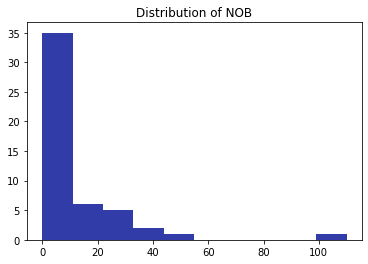

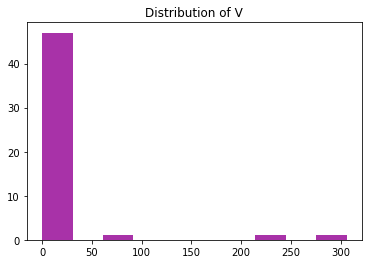

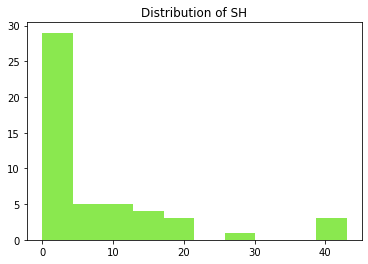

In [97]:
#show the distribution of 3 metrics
def plotHist(columnName,colorName):
    plt.hist(data[columnName], color=colorName)
    plt.title("Distribution of "+columnName)
    plt.show()

plotHist("NOB","#323ca8")
plotHist("V","#a832a8")
plotHist("SH","#8ae84f")


In [98]:
#Min max scaler for all data
minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(data.drop("Name", axis=1).values))
minmax.columns = data.columns[1:]
minmax.index=data["Name"].values
minmax

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
Alarmio-master,0.200000,0.055556,0.069767,0.0845,0.070707,0.081967,0.450368,0.547340,0.241690,0.328644,0.215585,0.467183,0.678344,0.483014,0.493334,0.904251
AndroidAsyncHTTP-master,0.100000,0.065359,0.325581,0.2470,0.237374,0.491803,0.586374,0.604499,1.000000,0.295288,0.624553,0.432401,0.423548,0.396145,0.465703,1.000000
android-pdf-viewer-master,0.018182,0.003268,0.000000,0.0020,0.000000,1.000000,0.000000,0.136835,0.076369,0.091712,0.275531,0.235422,0.536514,0.219697,0.231116,0.765504
android-permission-handler-master,0.009091,0.003268,0.023256,0.0030,0.000000,0.172131,0.102941,0.273670,0.177037,0.104300,0.204577,0.411564,0.362383,0.200758,0.299212,0.765504
Android-WhatsApp-master,0.000000,0.019608,0.000000,0.1265,0.171717,0.344262,0.044649,0.778146,0.088330,0.834019,1.000000,1.000000,0.885917,0.248036,1.000000,0.415032
android-youtubeExtractor-master,0.036364,0.058824,0.162791,0.0500,0.191919,0.254098,0.247059,0.514500,0.279926,0.755345,0.176454,0.532671,0.779704,0.427866,0.745788,0.845116
androidtv-sample-inputs-master,0.136364,0.009804,0.000000,0.0775,0.151515,0.081967,0.298861,0.681968,0.338284,0.573309,0.692028,0.541490,0.664970,0.528409,0.524693,0.725994
BirthdayBuddy-master,0.009091,0.000000,0.000000,0.0345,0.050505,0.016393,0.000000,0.000000,0.000000,1.000000,0.103223,0.000000,0.000000,0.000000,0.000000,0.000000
dex2jar,0.309091,1.000000,1.000000,1.0000,0.510101,0.139344,0.618665,1.000000,0.332216,0.716229,0.337156,0.743482,0.633001,0.391777,0.826300,0.692359
epubator-master,0.000000,0.039216,0.186047,0.0670,0.000000,0.245902,0.315394,0.596833,0.252593,0.110854,0.127673,0.374684,0.473776,0.370890,0.308613,0.517937


# Part1 (Statistical Correlation Analysis)

In [99]:
#Show the correlation matrix of all metrics
df=data.corr(method="spearman")
df

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383,0.407858,0.353351,0.447180,0.349883,0.369028,0.458483,0.277107,0.062748,0.507420,0.245963
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757,0.409002,0.426221,0.345986,0.243636,0.208594,0.468565,0.289585,0.029765,0.397770,0.110767
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546,0.512876,0.391886,0.425499,0.129174,0.204069,0.278723,0.156120,-0.016116,0.349367,0.107688
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611,0.402859,0.577439,0.492868,0.440458,0.260596,0.456943,0.388502,0.065511,0.569857,0.218801
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.407858,0.409002,0.512876,0.402859,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.353351,0.426221,0.391886,0.577439,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.447180,0.345986,0.425499,0.492868,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.349883,0.243636,0.129174,0.440458,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072


In [100]:
#P values of Spearman Correlation Table
p_value = scipy.stats.spearmanr(data.drop(["Name"],axis=1))[1]
p_value = pd.DataFrame(np.around(p_value,4))
p_value.columns = data.columns[1:]
p_value.index = data.columns[1:]
p_value

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,0.0000,0.0000,0.0000,0.0000,0.0076,0.3558,0.0033,0.0118,0.0011,0.0127,0.0084,0.0008,0.0514,0.6651,0.0002,0.0851
V,0.0000,0.0000,0.0000,0.0000,0.0486,0.0364,0.0032,0.0020,0.0138,0.0882,0.1460,0.0006,0.0414,0.8374,0.0042,0.4438
SH,0.0000,0.0000,0.0000,0.0000,0.0058,0.8548,0.0001,0.0049,0.0021,0.3713,0.1552,0.0500,0.2790,0.9115,0.0129,0.4566
CS,0.0000,0.0000,0.0000,0.0000,0.0000,0.1756,0.0037,0.0000,0.0003,0.0014,0.0676,0.0009,0.0053,0.6513,0.0000,0.1269
CDR,0.0076,0.0486,0.0058,0.0000,0.0000,0.9264,0.1800,0.1394,0.0918,0.0198,0.2330,0.0881,0.0971,0.7897,0.0146,0.3935
TD,0.3558,0.0364,0.8548,0.1756,0.9264,0.0000,0.2119,0.9250,0.3819,0.8302,0.4293,0.0945,0.0930,0.9059,0.3771,0.0122
NOC,0.0033,0.0032,0.0001,0.0037,0.1800,0.2119,0.0000,0.0000,0.0000,0.4058,0.0360,0.0596,0.6078,0.9258,0.2283,0.2557
CBO,0.0118,0.0020,0.0049,0.0000,0.1394,0.9250,0.0000,0.0000,0.0023,0.2188,0.0794,0.0000,0.0919,0.4483,0.0003,0.9992
RFC,0.0011,0.0138,0.0021,0.0003,0.0918,0.3819,0.0000,0.0023,0.0000,0.3513,0.0062,0.0027,0.6165,0.0012,0.0001,0.0970
LOC,0.0127,0.0882,0.3713,0.0014,0.0198,0.8302,0.4058,0.2188,0.3513,0.0000,0.3807,0.0000,0.0000,0.6515,0.0000,0.2082


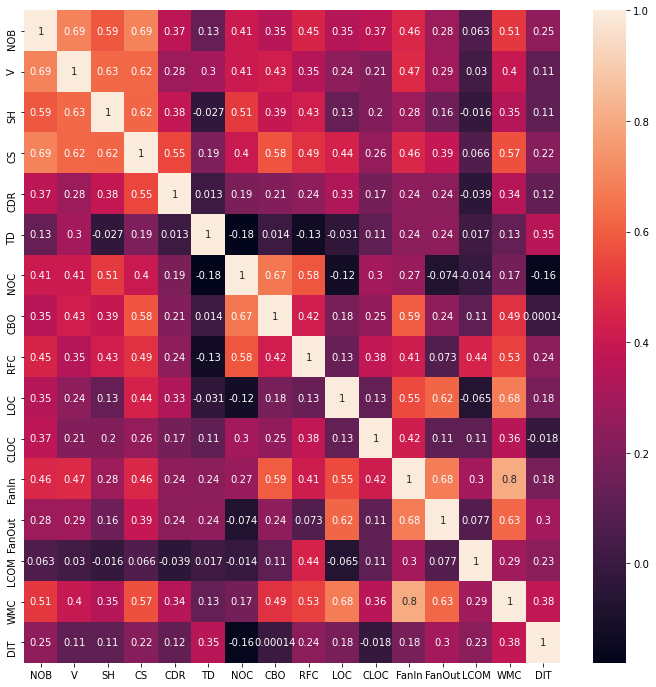

In [101]:
#If you want to see heatmap of the correlation matrix, you can launch code below:
plt.figure(figsize=(12,12))
sns.heatmap(df, annot = True)
plt.show()

In [102]:
#Correlation between External Metrics & TD
ext_td = df.iloc[:6,:6]
ext_td

,NOB,V,SH,CS,CDR,TD
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000


In [103]:
#Correlation between Internal Metrics & TD
int_td = df.iloc[4:,4:]
int_td

,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
CDR,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072
CLOC,0.171773,0.114297,0.297347,0.250408,0.381636,0.126681,1.000000,0.416789,0.109636,0.107619,0.355080,-0.017867
FanIn,0.243709,0.239077,0.268289,0.594578,0.414878,0.554326,0.416789,1.000000,0.679297,0.296355,0.802910,0.179395
FanOut,0.237237,0.240135,-0.074350,0.240953,0.072564,0.618676,0.109636,0.679297,1.000000,0.076982,0.626327,0.295389
LCOM,-0.038683,0.017159,-0.013518,0.109694,0.444076,-0.065455,0.107619,0.296355,0.076982,1.000000,0.291312,0.229251


# Part2 (ML Modelling)



We are going to use 5 different ML Regression Models to predict Technical Debt values:

>Linear Regression

>Support Vector Regression

>Decision Tree Regression

>Random Forest Tree Regression

>Multi-layer Perceptron

70% of our data will be used as training set and 30% as test set. Training and test sets will be randomly. The “random_state” variable will have a fixed value so that all models get the same random data. In this way, we will be able to evaluate the success rate of the different models objectively.


In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestCentroid
from sklearn.preprocessing import StandardScaler


def linearRegression(X_train, X_test, y_train, y_test):
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    plt.scatter(y_test, y_test, color = '#fc8403', label="Original Values")
    plt.scatter(y_test, y_pred, color = '#03e8fc', label="Predicted Values")
    plt.legend()
    plt.title("Accuracy of Linear Reggessor for {}".format(i))
    print("Linear Regression - R2 Score:", r2_score(y_test, y_pred))
    print("Linear Regression - Root Mean Squared Error:", mean_squared_error(y_test, y_pred,squared=False))
    plt.show()



def svrRegression(X_train,X_test,y_train,y_test,kernel):
    reg = SVR(kernel = kernel)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    plt.scatter(y_test, y_test, color = '#fc8403', label="Original Values")
    plt.scatter(y_test, y_pred, color = '#03e8fc', label="Predicted Values")
    plt.legend()
    plt.title(f"Accuracy of SVR  Reggessor {kernel} Kernel for {i}")
    print(f"SVR Reggessor {kernel} Kernel - R2 Score:", r2_score(y_test, y_pred))
    print(f"SVR Reggessor {kernel} Kernel - Root Mean Squared Error:", mean_squared_error(y_test, y_pred,squared=False))
    plt.show()

    
def decisionTreeRegression(X_train,X_test,y_train,y_test):
    dt = DecisionTreeRegressor(random_state=53)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    plt.scatter(y_test, y_test, color = '#fc8403', label="Original Values")
    plt.scatter(y_test, y_pred, color = '#03e8fc', label="Predicted Values")
    plt.legend()
    plt.title("Accuracy of Desicion Tree Reggessor for {}".format(i))
    print("Decision Tree Regression - R2 Score:", r2_score(y_test, y_pred))
    print("Decision Tree Regression - Root Mean Squared Error:", mean_squared_error(y_test, y_pred,squared=False))
    plt.show()  



def randomDecTreeRegression(X_train,X_test,y_train,y_test):
    rf = RandomForestRegressor(random_state=53)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    plt.scatter(y_test, y_test, color = '#fc8403', label="Original Values")
    plt.scatter(y_test, y_pred, color = '#03e8fc', label="Predicted Values")
    plt.legend()
    plt.title("Accuracy of Random Desicion Tree Reggessor for {}".format(i))
    print("Random Decision Tree Regression - R2 Score:", r2_score(y_test, y_pred))
    print("Random Decision Tree Regression - Root Mean Squared Error:", mean_squared_error(y_test, y_pred,squared=False))
    plt.show()  



def mlpRegressor(X_train,X_test,y_train,y_test):
    mlpregressor = MLPRegressor(random_state=53, max_iter=5000)
    mlpregressor.fit(X_train,y_train)
    y_pred = mlpregressor.predict(X_test)
    plt.scatter(y_test, y_test, color = '#fc8403', label="Original Values")
    plt.scatter(y_test, y_pred, color = '#03e8fc', label="Predicted Values")
    plt.legend()
    plt.title("Accuracy of Multi-layer Perceptron Regressor for {}".format(i))
    print("Multi-layer Perceptron Regressor - R2 Score:", r2_score(y_test, y_pred))
    print("Multi-layer Perceptron Regressor - Root Mean Squared Error:", mean_squared_error(y_test, y_pred,squared=False))
    plt.show()


# STEP 3  estimate Technical Debt using internal metrics

In [105]:
#split data into train and test data
X = minmax.iloc[:,6:].values
y = minmax.iloc[:,4:6].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 53,test_size = 0.3)

Linear Regression - R2 Score: -0.17296753046920732
Linear Regression - Root Mean Squared Error: 0.2650640776760429


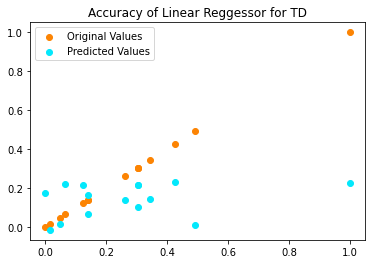

Linear Regression - R2 Score: -0.25353936900603125
Linear Regression - Root Mean Squared Error: 0.2822820349754405


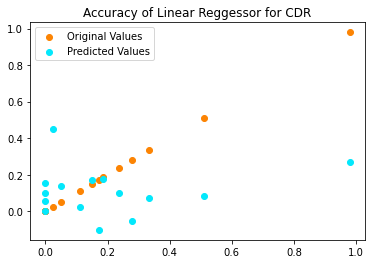

In [106]:
#Model for Linear Regression (also R-Squared Value and Root Mean Squared Error )

for i in ["TD","CDR"]:
    y = minmax[i].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 53,test_size = 0.3)
    linearRegression(X_train,X_test,y_train,y_test)

SVR Reggessor rbf Kernel - R2 Score: -0.07658669531666251
SVR Reggessor rbf Kernel - Root Mean Squared Error: 0.25394074173641473


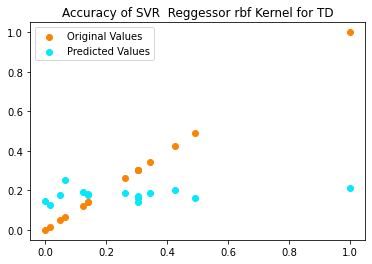

SVR Reggessor linear Kernel - R2 Score: -0.3526354995047598
SVR Reggessor linear Kernel - Root Mean Squared Error: 0.2846415332813681


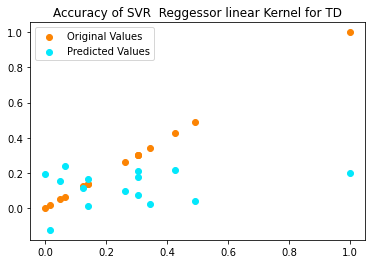

SVR Reggessor rbf Kernel - R2 Score: -0.16455641994479597
SVR Reggessor rbf Kernel - Root Mean Squared Error: 0.2720786834980814


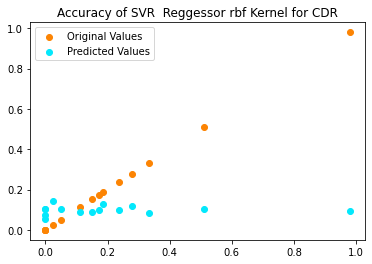

SVR Reggessor linear Kernel - R2 Score: -0.12212300389682662
SVR Reggessor linear Kernel - Root Mean Squared Error: 0.2670757664434763


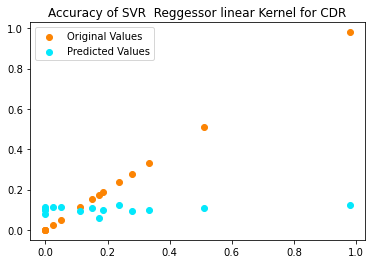

In [107]:
#Model for SVR Regression (also R-Squared Value and Root Mean Squared Error )
for i in ["TD","CDR"]:
    y = np.array(minmax[i])
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 53,test_size = 0.3)
    for j in ['rbf',"linear"]:
        svrRegression(X_train,X_test,y_train,y_test,j)

Decision Tree Regression - R2 Score: -0.5204592360688753
Decision Tree Regression - Root Mean Squared Error: 0.30178334647732696


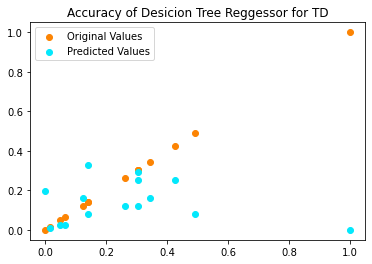

Decision Tree Regression - R2 Score: -0.12150757783825572
Decision Tree Regression - Root Mean Squared Error: 0.26700251782083956


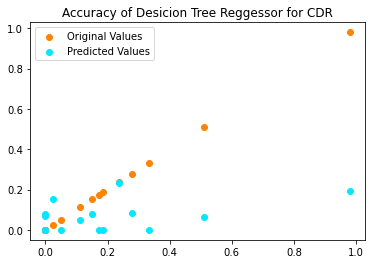

In [108]:
#Model for Decision Tree Regression (also R-Squared Value and Root Mean Squared Error )
for i in ["TD","CDR"]:
    y = np.array(minmax[i])
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 53,test_size = 0.3)
    decisionTreeRegression(X_train,X_test,y_train,y_test)

Random Decision Tree Regression - R2 Score: -0.16969786733401793
Random Decision Tree Regression - Root Mean Squared Error: 0.26469438498303655


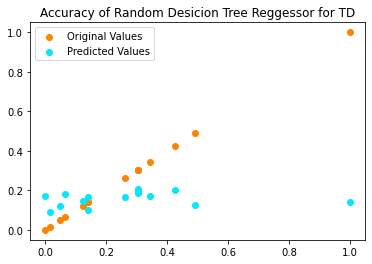

Random Decision Tree Regression - R2 Score: -0.05101676969007363
Random Decision Tree Regression - Root Mean Squared Error: 0.25847531504491733


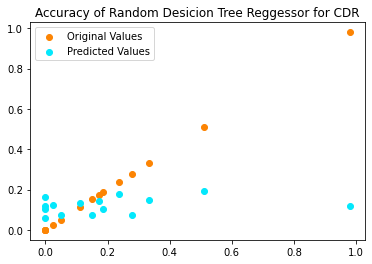

In [109]:
#Model for Random Decision Tree Regression (also R-Squared Value and Root Mean Squared Error )
for i in ["TD","CDR"]:
    y = np.array(minmax[i])
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 53,test_size = 0.3)
    randomDecTreeRegression(X_train,X_test,y_train,y_test)

Multi-layer Perceptron Regressor - R2 Score: -0.4871772319255998
Multi-layer Perceptron Regressor - Root Mean Squared Error: 0.2984621365383263


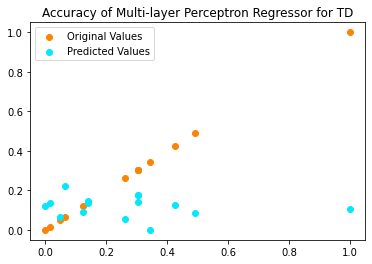

Multi-layer Perceptron Regressor - R2 Score: -0.22435327148884165
Multi-layer Perceptron Regressor - Root Mean Squared Error: 0.27897650141415087


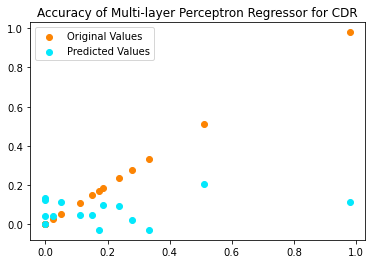

In [110]:
#Model for Multi-layer Perceptron Regressor (also R-Squared Value and Root Mean Squared Error )
for i in ["TD","CDR"]:
    y = np.array(minmax[i])
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 53,test_size = 0.3)
    mlpRegressor(X_train,X_test,y_train,y_test)

# STEP 4 estimate Technical Debt using external metrics

In [111]:
#split data into train and test data
X = minmax.iloc[:,:4]
y = minmax.iloc[:,4:6]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 53,test_size = 0.3)

Linear Regression - R2 Score: -0.4331628534217624
Linear Regression - Root Mean Squared Error: 0.2929919249634493


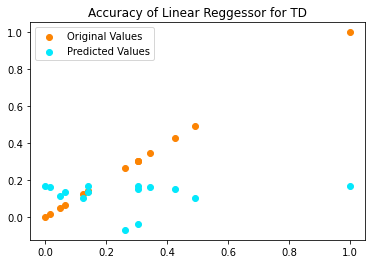

Linear Regression - R2 Score: -0.29877407933861844
Linear Regression - Root Mean Squared Error: 0.2873300555429503


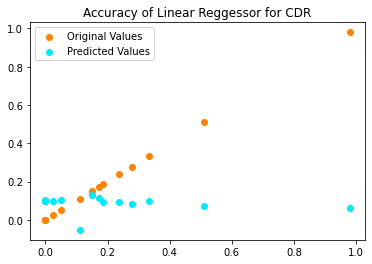

In [112]:
#Model for Linear Regression (also R-Squared Value and Root Mean Squared Error )
for i in ["TD","CDR"]:
    y = np.array(minmax[i])
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 53,test_size = 0.3)
    linearRegression(X_train,X_test,y_train,y_test)

SVR Reggessor rbf Kernel - R2 Score: -0.45281551449179935
SVR Reggessor rbf Kernel - Root Mean Squared Error: 0.2949939533353097


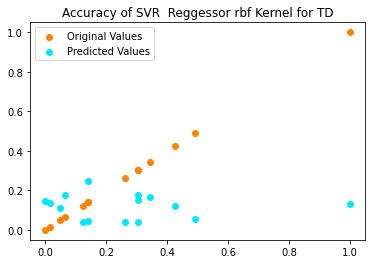

SVR Reggessor linear Kernel - R2 Score: -0.3170558678590276
SVR Reggessor linear Kernel - Root Mean Squared Error: 0.28087299055485854


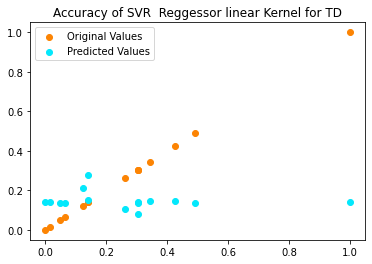

SVR Reggessor rbf Kernel - R2 Score: -0.05742000726843233
SVR Reggessor rbf Kernel - Root Mean Squared Error: 0.2592614897703499


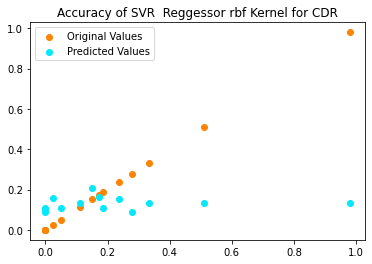

SVR Reggessor linear Kernel - R2 Score: -0.10105796501066222
SVR Reggessor linear Kernel - Root Mean Squared Error: 0.2645570517029422


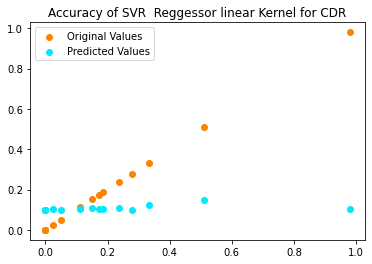

In [113]:
#Model for SVR (also R-Squared Value and Root Mean Squared Error )
for i in ["TD","CDR"]:
    y = np.array(minmax[i])
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 53,test_size = 0.3)
    for j in ['rbf',"linear"]:
        svrRegression(X_train,X_test,y_train,y_test,j)

Decision Tree Regression - R2 Score: -0.7371656181142008
Decision Tree Regression - Root Mean Squared Error: 0.32257335573307827


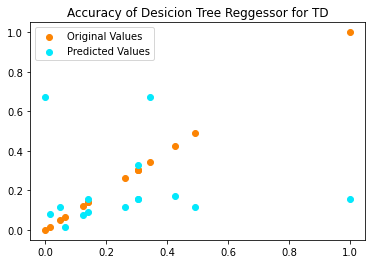

Decision Tree Regression - R2 Score: -0.49827719657436775
Decision Tree Regression - Root Mean Squared Error: 0.3086102422213462


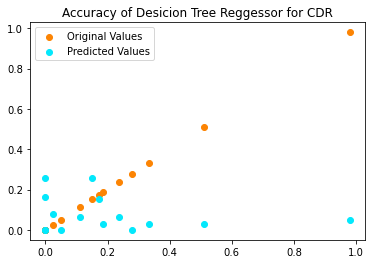

In [114]:
#Model for Decision Tree Regression (also R-Squared Value and Root Mean Squared Error )
for i in ["TD","CDR"]:
    y = np.array(minmax[i])
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 53,test_size = 0.3)
    decisionTreeRegression(X_train,X_test,y_train,y_test)

Random Decision Tree Regression - R2 Score: -0.11428872623308783
Random Decision Tree Regression - Root Mean Squared Error: 0.2583489780064541


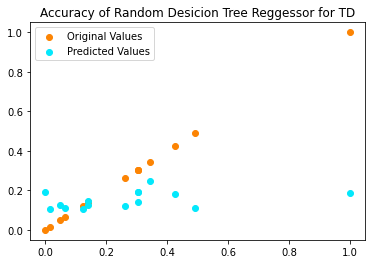

Random Decision Tree Regression - R2 Score: -0.26333860652667807
Random Decision Tree Regression - Root Mean Squared Error: 0.28338322249338543


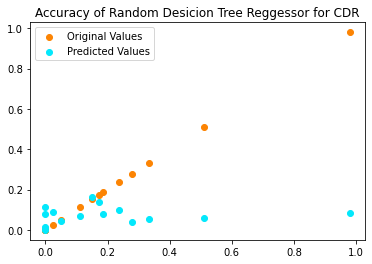

In [115]:
#Model for Random Decision Tree Regression (also R-Squared Value and Root Mean Squared Error )
for i in ["TD","CDR"]:
    y = np.array(minmax[i])
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 53,test_size = 0.3)
    randomDecTreeRegression(X_train,X_test,y_train,y_test)

Multi-layer Perceptron Regressor - R2 Score: -0.1905169499496393
Multi-layer Perceptron Regressor - Root Mean Squared Error: 0.2670396014132049


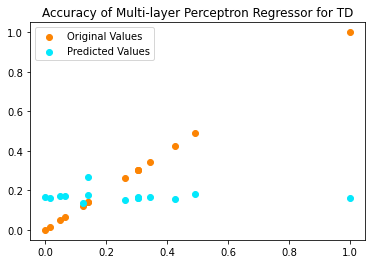

Multi-layer Perceptron Regressor - R2 Score: -0.1733124776552255
Multi-layer Perceptron Regressor - Root Mean Squared Error: 0.2730996195799929


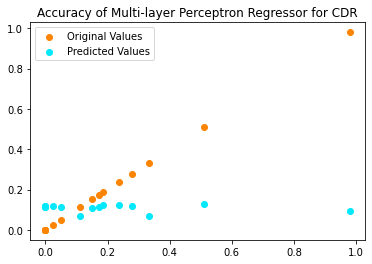

In [116]:
#Model for Multi-layer Perceptron Regressor (also R-Squared Value and Root Mean Squared Error )
for i in ["TD","CDR"]:
    y = np.array(minmax[i])
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 53,test_size = 0.3)
    mlpRegressor(X_train,X_test,y_train,y_test)

# STEP 5 estimate Technical Debt using all internal and external metrics

In [117]:
#split data into train and test data
y = minmax.iloc[:,4:6].values
X = minmax.drop(["CDR", "TD"], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 53,test_size = 0.3)

Linear Regression - R2 Score: -0.003633279100097697
Linear Regression - Root Mean Squared Error: 0.2451858519572479


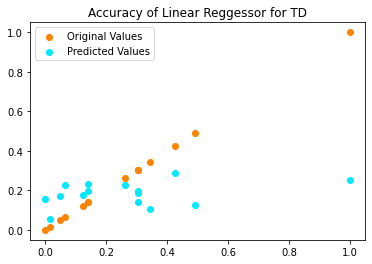

Linear Regression - R2 Score: -2.009141591295796
Linear Regression - Root Mean Squared Error: 0.43735647669844613


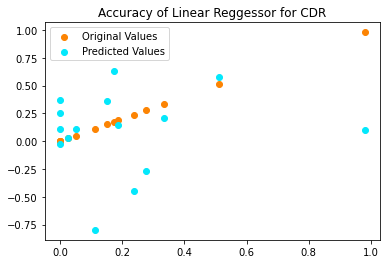

In [118]:
#Model for Linear Regression (also R-Squared Value and Root Mean Squared Error )
for i in ["TD","CDR"]:
    y = np.array(minmax[i])
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 53,test_size = 0.3)
    linearRegression(X_train,X_test,y_train,y_test)

SVR Reggessor rbf Kernel - R2 Score: -0.09720921648004222
SVR Reggessor rbf Kernel - Root Mean Squared Error: 0.2563613813817413


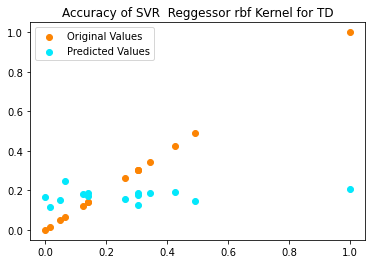

SVR Reggessor linear Kernel - R2 Score: -0.36281172246930304
SVR Reggessor linear Kernel - Root Mean Squared Error: 0.2857102425477753


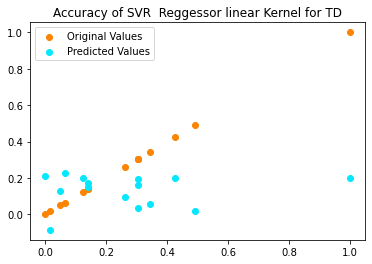

SVR Reggessor rbf Kernel - R2 Score: -0.23945919966775864
SVR Reggessor rbf Kernel - Root Mean Squared Error: 0.2806922153718834


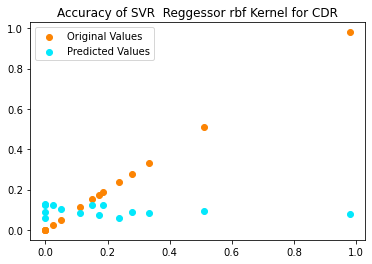

SVR Reggessor linear Kernel - R2 Score: -0.1605709781449498
SVR Reggessor linear Kernel - Root Mean Squared Error: 0.2716127193456499


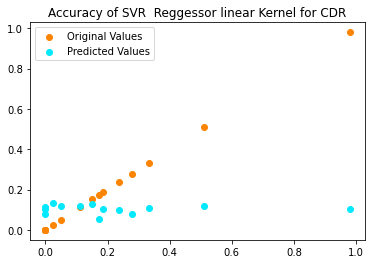

In [119]:
#Model for SVR (also R-Squared Value and Root Mean Squared Error )
for i in ["TD","CDR"]:
    y = np.array(minmax[i])
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 53,test_size = 0.3)
    for j in ['rbf',"linear"]:
        svrRegression(X_train,X_test,y_train,y_test,j)

Decision Tree Regression - R2 Score: -0.2556706581453083
Decision Tree Regression - Root Mean Squared Error: 0.2742494419820825


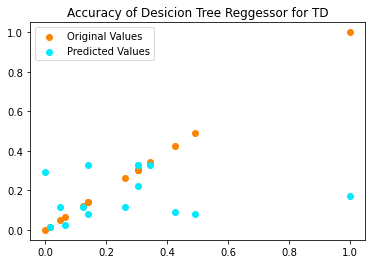

Decision Tree Regression - R2 Score: -0.05417378556625985
Decision Tree Regression - Root Mean Squared Error: 0.25886322456148736


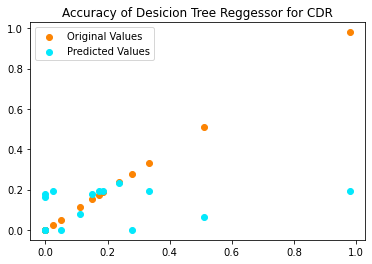

In [120]:
#Model for Decision Tree Regression (also R-Squared Value and Root Mean Squared Error )
for i in ["TD","CDR"]:
    y = np.array(minmax[i])
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 53,test_size = 0.3)
    decisionTreeRegression(X_train,X_test,y_train,y_test)

Random Decision Tree Regression - R2 Score: 0.07627455457291843
Random Decision Tree Regression - Root Mean Squared Error: 0.23522275547294955


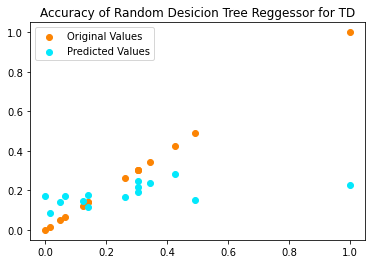

Random Decision Tree Regression - R2 Score: 0.01479470371704672
Random Decision Tree Regression - Root Mean Squared Error: 0.2502520360002964


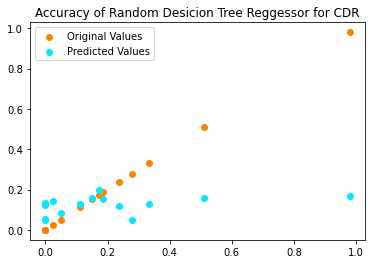

In [121]:
#Model for Random Decision Tree Regression (also R-Squared Value and Root Mean Squared Error )
for i in ["TD","CDR"]:
    y = np.array(minmax[i])
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 53,test_size = 0.3)
    randomDecTreeRegression(X_train,X_test,y_train,y_test)

Multi-layer Perceptron Regressor - R2 Score: -0.09356621979107316
Multi-layer Perceptron Regressor - Root Mean Squared Error: 0.25593543701691623


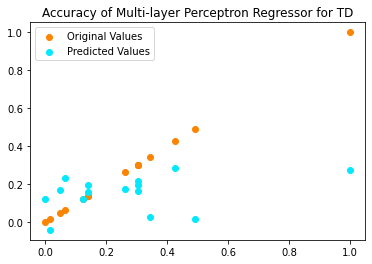

Multi-layer Perceptron Regressor - R2 Score: -0.47729270505957055
Multi-layer Perceptron Regressor - Root Mean Squared Error: 0.30644146309720954


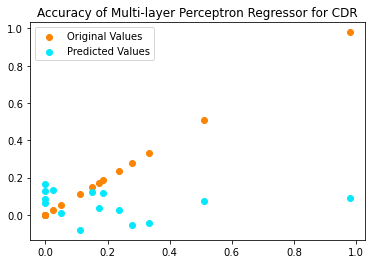

In [122]:
#Model for Multi-layer Perceptron Regressor (also R-Squared Value and Root Mean Squared Error )
for i in ["TD","CDR"]:
    y = np.array(minmax[i])
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 53,test_size = 0.3)
    mlpRegressor(X_train,X_test,y_train,y_test)